In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('data/wine.csv')

In [97]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 4, 7, 10],
       labels = ['low', 'medium', 'high'])

In [98]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,qual_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,medium
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,medium
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,medium


In [99]:
df['qual_cat'].value_counts()

medium    6053
low        246
high       198
Name: qual_cat, dtype: int64

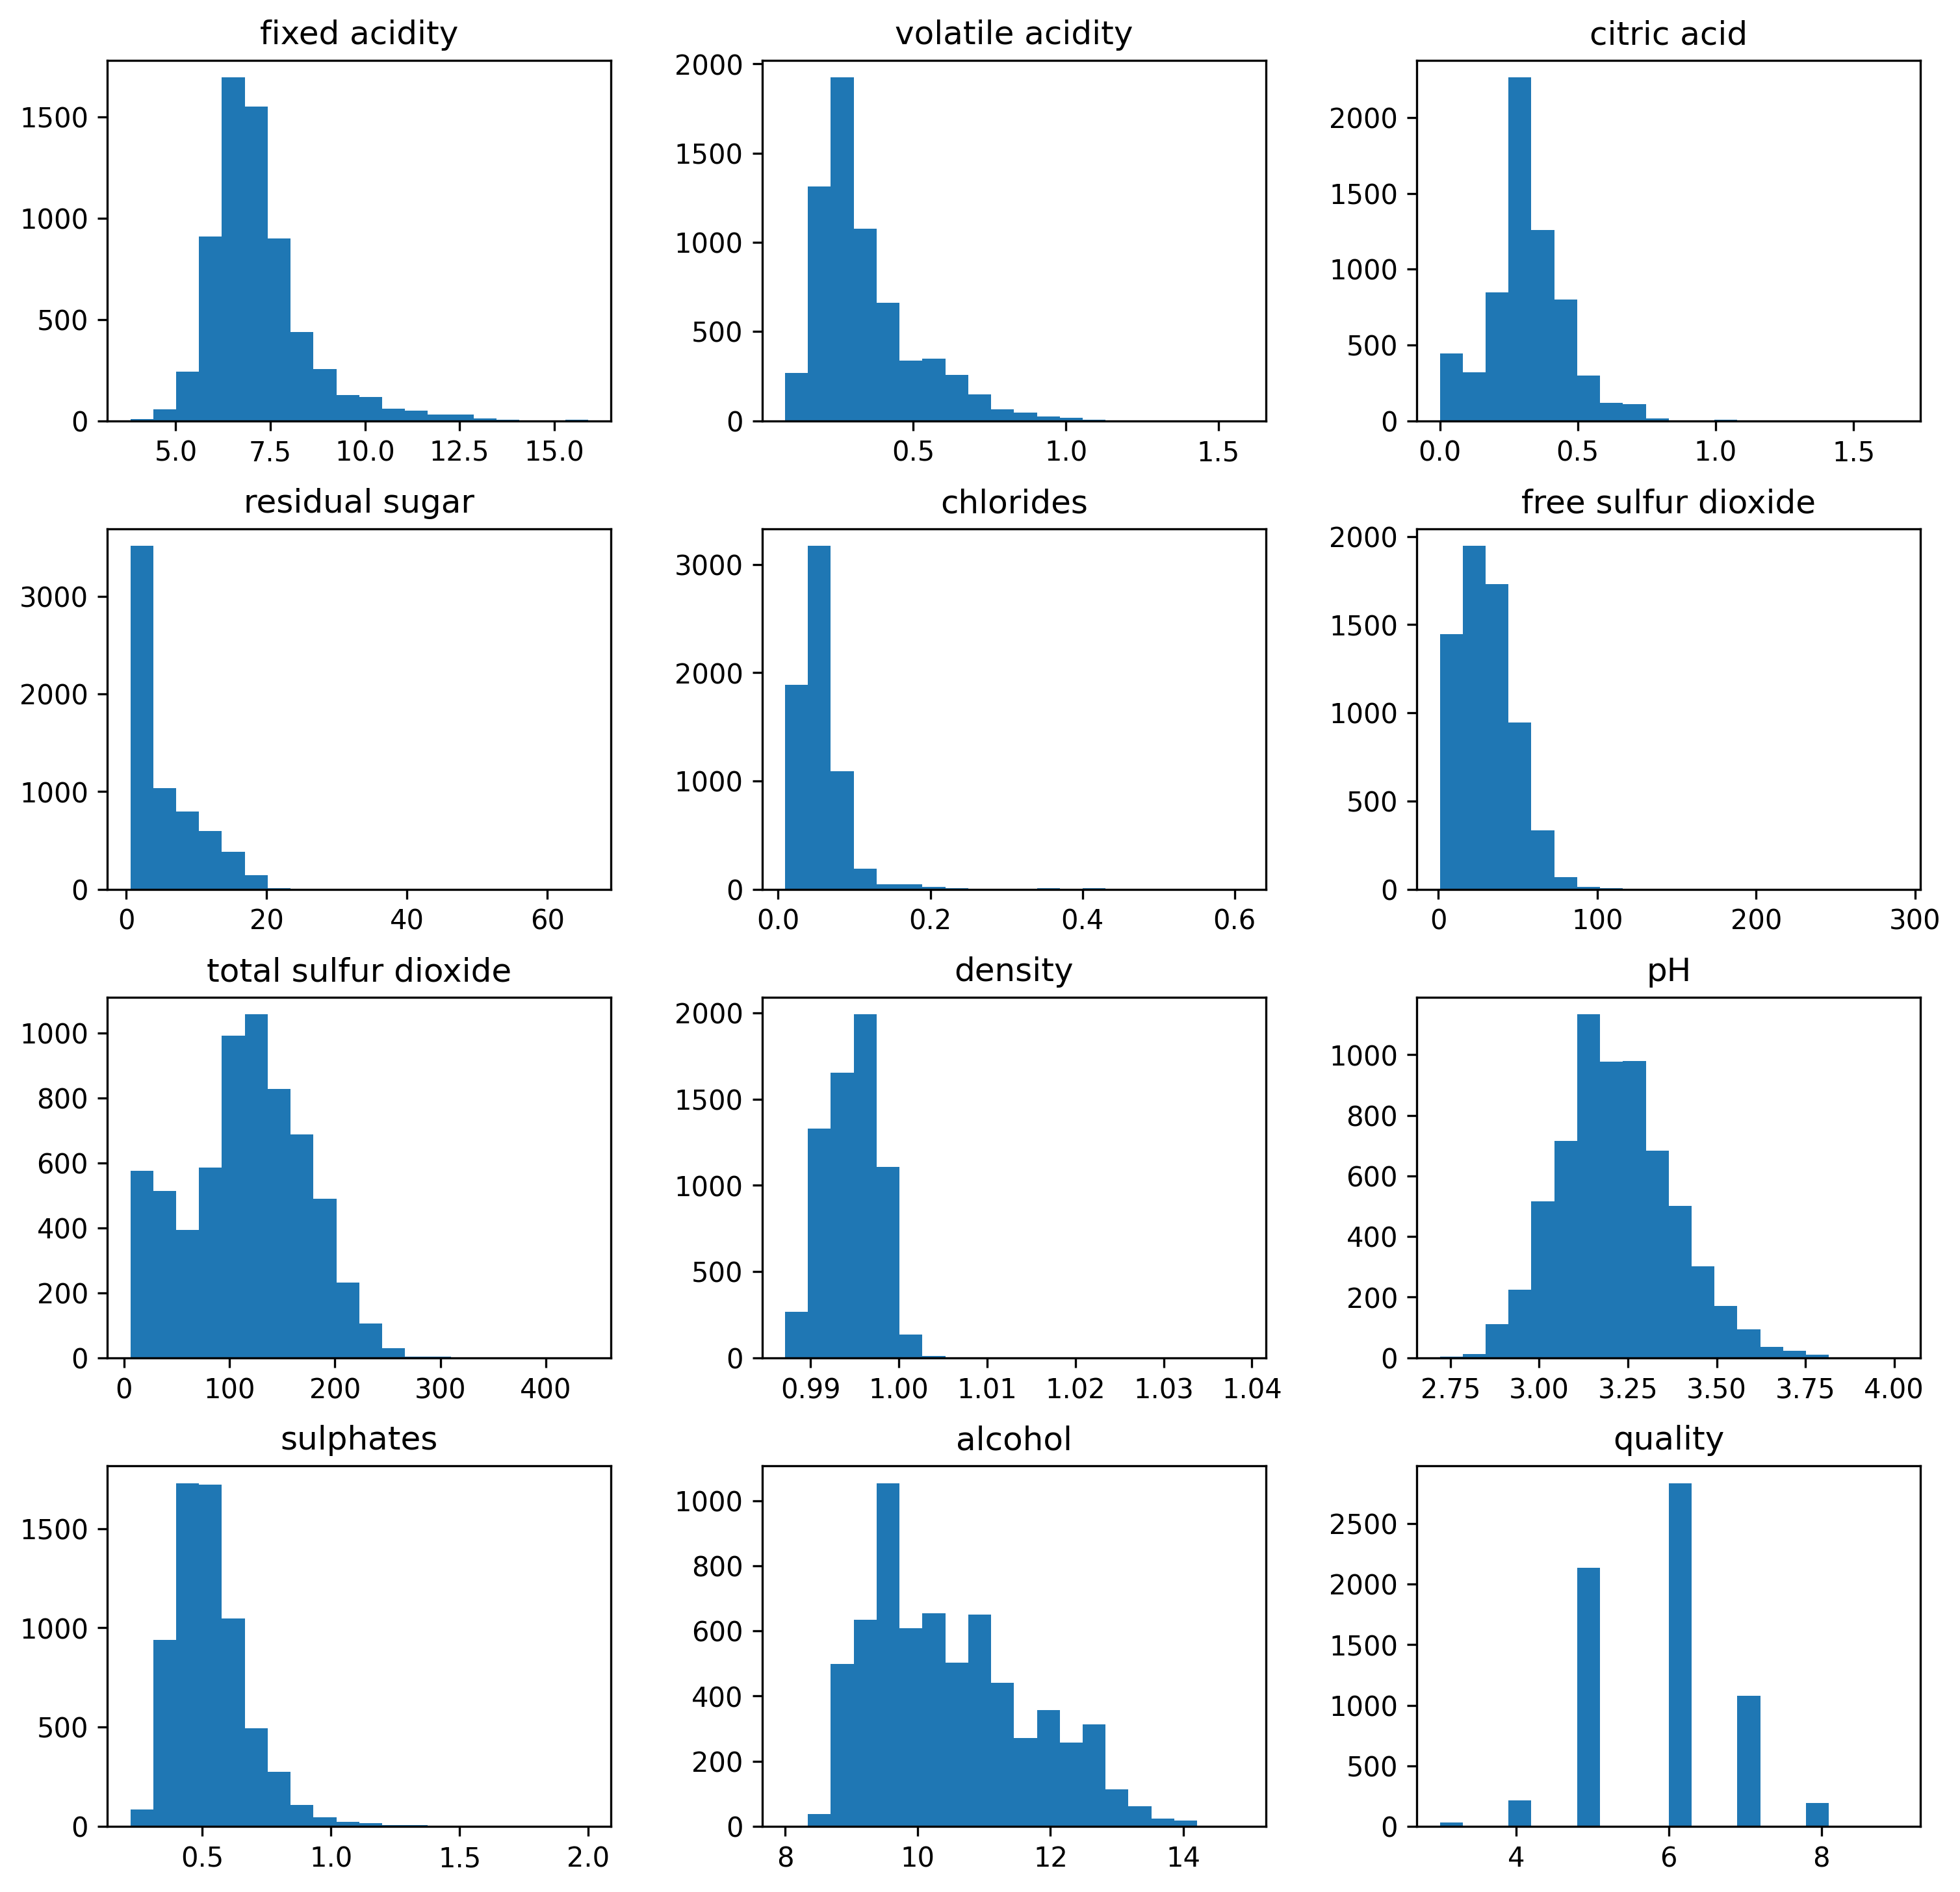

In [100]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [101]:
df.groupby('qual_cat').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qual_cat,,,,,,,,,,,,
low,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
medium,7.221469,0.336151,0.319974,5.493772,0.056285,30.704940,116.095985,0.994759,3.217614,0.532959,10.465055,5.825045
high,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414,8.025253


In [102]:
dv = 'alcohol'
group = 'qual_cat'

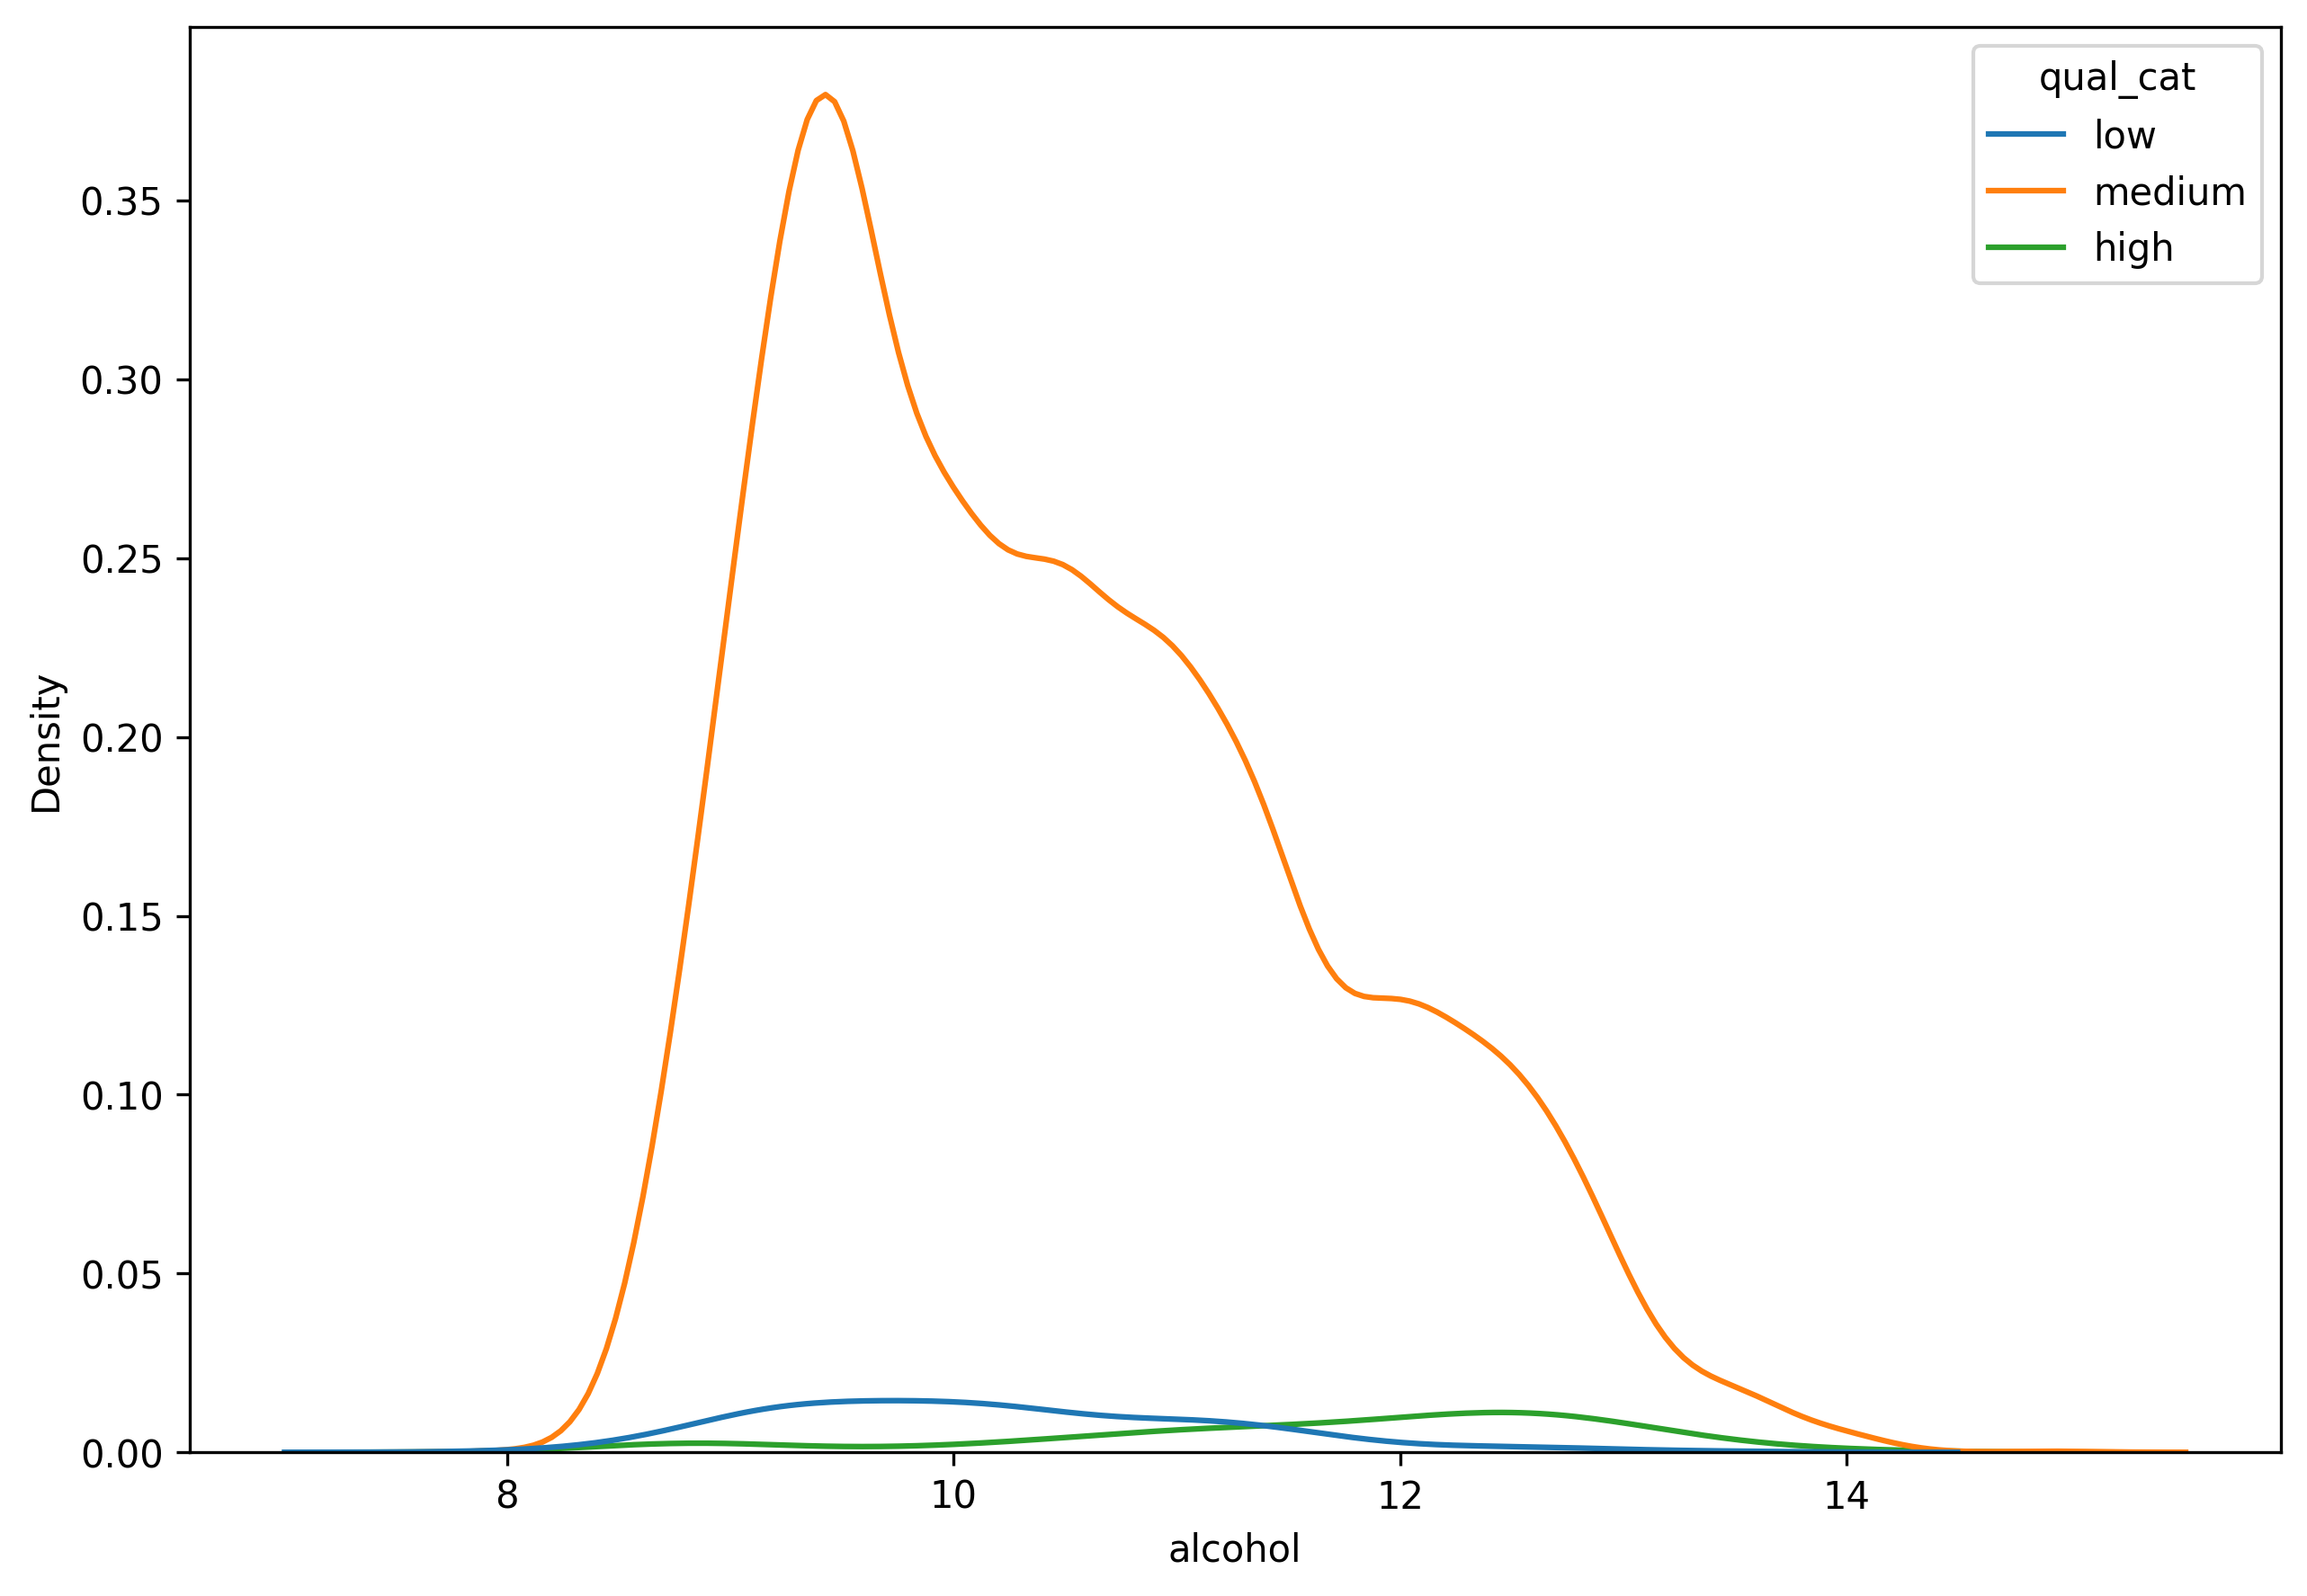

In [103]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [104]:
pg.normality(df, dv = dv, group = group)

c:\users\derevirn\miniconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
low,0.971233,7.020882e-05,False
medium,0.951751,1.029086e-40,False
high,0.920016,6.679316e-09,False


In [105]:
pg.anova(df, dv = dv, between = group)

,Source,ddof1,ddof2,F,p-unc,np2
0,qual_cat,2,6494,113.653807,3.054841e-49,0.033819


In [106]:
pg.pairwise_tukey(df, dv = dv, between = group)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,low,medium,10.184350,10.465055,-0.280706,0.076263,-3.680754,6.858535e-04,-0.239369
1,low,high,10.184350,11.691414,-1.507065,0.111950,-13.461979,3.596012e-13,-1.283105
2,medium,high,10.465055,11.691414,-1.226359,0.084681,-14.482019,3.596012e-13,-1.045764


In [107]:
df.skew(numeric_only = True)

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64